In [241]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard

from time import time

print(tf.__version__)

2.8.0


In [242]:
#Import the Fashion MNIST dataset DATALOADER

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [243]:
#store class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [244]:
train_images.shape

(60000, 28, 28)

In [245]:
len(train_labels)

60000

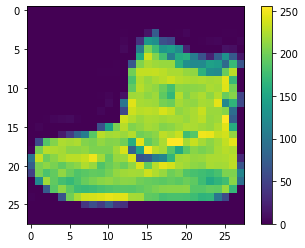

In [246]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [247]:
#scale to range 0 - 1
train_images = train_images / 255.0

test_images = test_images / 255.0


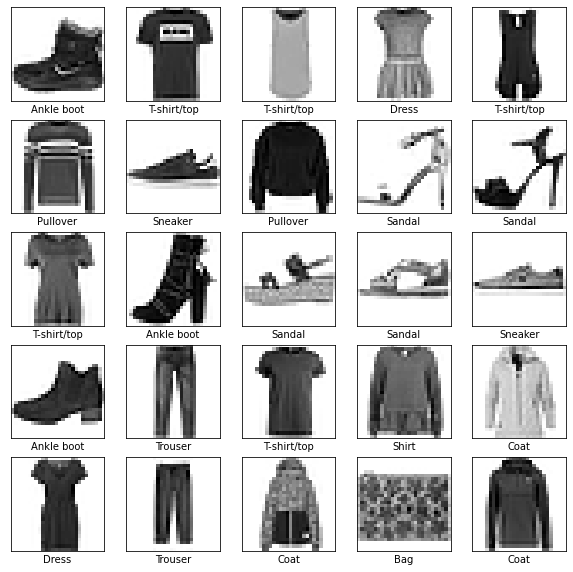

In [248]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [249]:
#display some images
def display_image(position):
    image = train_images[position]
    plt.title('Example %d. Label: %s' % (position, class_names[train_labels[position]]))
    plt.imshow(image, cmap=plt.cm.gray_r)

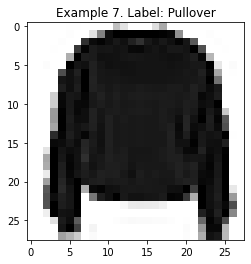

In [250]:
display_image(7)

In [251]:
# split training data into training and validation
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=0)

In [252]:
# explore the data
print('# of training images:', train_images.shape[0])
print('# of validation images:', validation_images.shape[0])
print('# of test images:', test_images.shape[0])

# of training images: 48000
# of validation images: 12000
# of test images: 10000


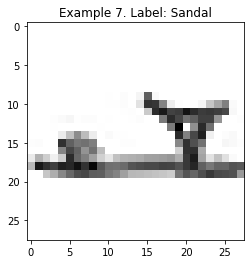

In [253]:
display_image(7)

In [254]:
# Pad images with 0s since we want to apply it to LeNet
train_images      = np.pad(train_images, ((0,0),(2,2),(2,2)), 'constant')
validation_images = np.pad(validation_images, ((0,0),(2,2),(2,2)), 'constant')
test_images       = np.pad(test_images, ((0,0),(2,2),(2,2)), 'constant')
    
print("Updated Image Shape: {}".format(train_images[0].shape))

Updated Image Shape: (32, 32)


In [255]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(),                       
    tf.keras.layers.Flatten(), #or Flatten(input_shape=(28, 28))
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [256]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 6)         60        
                                                                 
 average_pooling2d_18 (Avera  (None, 15, 15, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_19 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)                                                    
                                                                 
 flatten_9 (Flatten)         (None, 576)               0         
                                                                 
 dense_27 (Dense)            (None, 120)              

In [257]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [258]:
EPOCHS = 14
BATCH_SIZE = 128

In [259]:
#add channel = 1 for greyscale
train_images=train_images[:,:,:,None]
validation_images=validation_images[:,:,:,None]
#train_images.shape
validation_images.shape

(12000, 32, 32, 1)

In [260]:
X_train, y_train = train_images, to_categorical(train_labels)
X_validation, y_validation = validation_images, to_categorical(validation_labels)

In [261]:
print('# of training images:', train_images.shape[0])
print('# of validation images:', validation_images.shape[0])

history=model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_validation, y_validation))

# of training images: 48000
# of validation images: 12000
Epoch 1/14
375/375 [==============================] - 2s 5ms/step - loss: 0.7135 - accuracy: 0.7488 - val_loss: 0.4948 - val_accuracy: 0.8232
Epoch 2/14
375/375 [==============================] - 2s 4ms/step - loss: 0.4604 - accuracy: 0.8330 - val_loss: 0.4122 - val_accuracy: 0.8539
Epoch 3/14
375/375 [==============================] - 2s 4ms/step - loss: 0.4027 - accuracy: 0.8537 - val_loss: 0.3739 - val_accuracy: 0.8638
Epoch 4/14
375/375 [==============================] - 2s 4ms/step - loss: 0.3629 - accuracy: 0.8666 - val_loss: 0.3580 - val_accuracy: 0.8703
Epoch 5/14
375/375 [==============================] - 2s 4ms/step - loss: 0.3398 - accuracy: 0.8762 - val_loss: 0.3372 - val_accuracy: 0.8810
Epoch 6/14
375/375 [==============================] - 2s 4ms/step - loss: 0.3163 - accuracy: 0.8844 - val_loss: 0.3357 - val_accuracy: 0.8775
Epoch 7/14
375/375 [==============================] - 2s 4ms/step - loss: 0.3015 - accurac

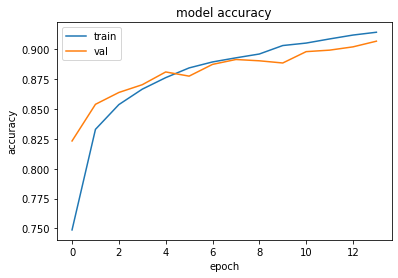

In [262]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

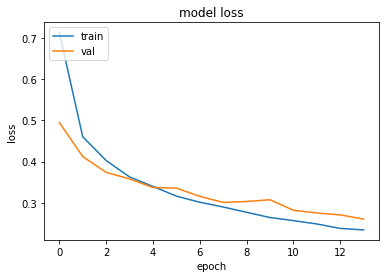

In [263]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [264]:
score = model.evaluate(test_images, to_categorical(test_labels))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2769 - accuracy: 0.9022
Test loss: 0.27688664197921753
Test accuracy: 0.9021999835968018
